<a href="https://colab.research.google.com/github/Ansalnakhan/TSA/blob/main/ansalnaSOHandRUL18a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2104]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [2105]:
import pandas as pd

In [2106]:
data=pd.read_csv("/content/B0018.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [2107]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


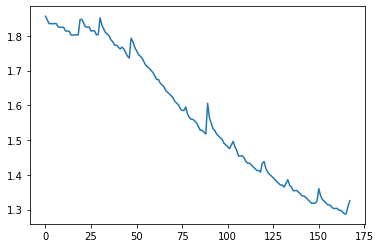

In [2108]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.show()

In [2109]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [2110]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

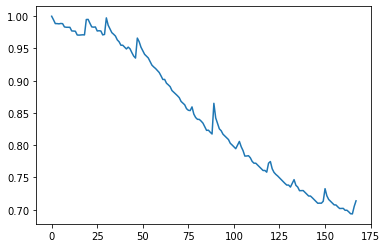

In [2111]:
plt.plot(range(len(soh)),soh)
plt.show()

In [2112]:
capacity=np.asarray(capacity)

In [2113]:
type(capacity)

numpy.ndarray

In [2114]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [2115]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [2116]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.6861
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0639
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0629
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0376
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0082
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0138
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 5.7740e-04


In [2117]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [2118]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [2119]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 5ms/step


0.0002494450234518649

In [2120]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.016


In [2121]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01411266]
R2_score:  0.6685637114518603


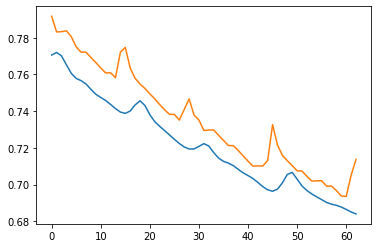

In [2122]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [2123]:
preds = model.predict(X)

6/6 [==============================] - 0s 3ms/step


In [2124]:
preds

array([[0.9315774 ],
       [0.92954504],
       [0.929048  ],
       [0.9288531 ],
       [0.92808586],
       [0.926471  ],
       [0.924939  ],
       [0.9241345 ],
       [0.9231943 ],
       [0.9214815 ],
       [0.91963977],
       [0.91817755],
       [0.91635466],
       [0.91476625],
       [0.9143526 ],
       [0.915501  ],
       [0.91926384],
       [0.92607564],
       [0.9312305 ],
       [0.9304555 ],
       [0.92716384],
       [0.9248691 ],
       [0.92347133],
       [0.9217098 ],
       [0.9198657 ],
       [0.9184606 ],
       [0.9178285 ],
       [0.91990876],
       [0.9252403 ],
       [0.92755634],
       [0.923816  ],
       [0.91918784],
       [0.91578007],
       [0.91279185],
       [0.90941054],
       [0.9059279 ],
       [0.9029832 ],
       [0.90078014],
       [0.8992072 ],
       [0.8979069 ],
       [0.8970731 ],
       [0.8956642 ],
       [0.8924754 ],
       [0.89001465],
       [0.8918185 ],
       [0.89853007],
       [0.9032259 ],
       [0.900

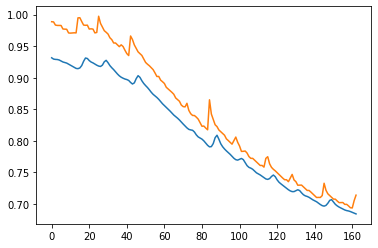

In [2125]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)

Predicting Capacity

In [2126]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [2127]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 5ms/step - loss: 2.6679
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 1.0449
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2792
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.1087
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1525
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1139
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0170
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0524
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0280


In [2128]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [2129]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 4ms/step


0.000862381756823197

In [2130]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.029


In [2131]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.02650739]
R2_score:  0.6675389654291244


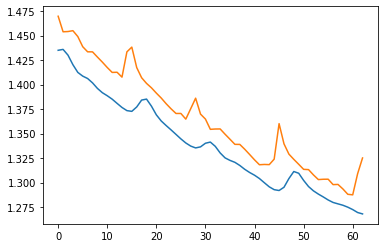

In [2132]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.show()

In [2133]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [2134]:
preds

array([[1.7389495],
       [1.7361585],
       [1.7356235],
       [1.7351145],
       [1.7328905],
       [1.7296125],
       [1.7273582],
       [1.7260139],
       [1.7234979],
       [1.7200555],
       [1.7170788],
       [1.7138519],
       [1.7102362],
       [1.7080338],
       [1.7076626],
       [1.7105798],
       [1.7208725],
       [1.7342976],
       [1.7400197],
       [1.7361907],
       [1.7305275],
       [1.7270848],
       [1.7239763],
       [1.720486 ],
       [1.7175466],
       [1.7143773],
       [1.7139677],
       [1.7218331],
       [1.73118  ],
       [1.730931 ],
       [1.722807 ],
       [1.7148536],
       [1.7088296],
       [1.702844 ],
       [1.6962012],
       [1.6897181],
       [1.6846248],
       [1.6808399],
       [1.6777701],
       [1.6758875],
       [1.6743869],
       [1.6704623],
       [1.6636012],
       [1.6602856],
       [1.6686175],
       [1.681885 ],
       [1.6855057],
       [1.6781062],
       [1.6684793],
       [1.6609021],


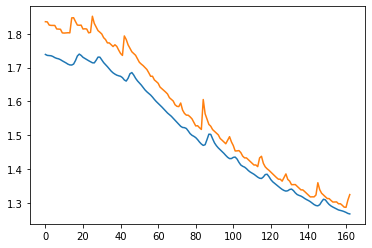

In [2135]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.show()